## IGO17131_IGO17186_combined - Hopx-MACD Rosa26-mTmG traced
6/8/2025 - Data generated from Hopx-MACD mice mTmG given Tamoxifen at 12 weeks and traced for 3 or 14 days. Data submitted by Chun-Hao/EB analyzed by Jason
Analyze global run on cellranger v8 data and create h5_ad files for further analysis

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

import math
import matplotlib
from matplotlib import pyplot as plt

from pathlib import Path
import anndata

In [2]:
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams["font.family"] = "Arial"
#plt.rcParams['figure.figsize'] = (3,4)

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')
np.random.seed(1573)   #fix so we can reproduce later

In [4]:
#Path("./figures").mkdir(parents=True, exist_ok=True) # generate figures here
Path("./write").mkdir(parents=True, exist_ok=True) # write h5ad here

In [5]:
adata1 = anndata.read('../IGO17131/write/allmice-tumor-IGO17131.h5ad')
adata2 = anndata.read('../IGO17186/write/allmice-tumor-IGO17186.h5ad')

/Users/chanj2/opt/miniconda3/envs/scbackup/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/Users/chanj2/opt/miniconda3/envs/scbackup/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [6]:
adata = adata1.concatenate(adata2, join='inner', batch_categories=['hopx_12wk_3d', 'hopx_12wk_2wk'])
adata.uns['log1p'] = {}
adata.uns['log1p']['base'] = None

/var/folders/xc/wjwqs2j55dqgp2ghrn6nmlj1nlk7kz/T/ipykernel_28156/786127171.py:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata = adata1.concatenate(adata2, join='inner', batch_categories=['hopx_12wk_3d', 'hopx_12wk_2wk'])


## Now select the traced mice (ie remove carrier cells)

In [7]:
adata.obs.Classification.value_counts()

Classification
BN1487-3    5059
BO1522      3062
BN1487-2    2765
BN1487-1    2680
BN1492      2110
BP1487       109
Name: count, dtype: int64

## Define sorting groups

In [8]:
adata.obs['Sorting_Groups'] = 'traced'
adata.obs['Sorting_Groups'].value_counts()

Sorting_Groups
traced    15785
Name: count, dtype: int64

In [9]:
adata.obs.Classification.value_counts()

Classification
BN1487-3    5059
BO1522      3062
BN1487-2    2765
BN1487-1    2680
BN1492      2110
BP1487       109
Name: count, dtype: int64

In [10]:
adata.obs[['batch','Classification']].value_counts()

batch          Classification
hopx_12wk_2wk  BN1487-3          5059
hopx_12wk_3d   BO1522            3062
hopx_12wk_2wk  BN1487-2          2765
               BN1487-1          2680
hopx_12wk_3d   BN1492            2110
               BP1487             109
Name: count, dtype: int64

In [11]:
adata.obs[['Group','Classification']].value_counts()

Group            Classification
Hopx_traced_14d  BN1487-3          5059
Hopx_traced_3d   BO1522            3062
Hopx_traced_14d  BN1487-2          2765
                 BN1487-1          2680
Hopx_traced_3d   BN1492            2110
                 BP1487             109
Name: count, dtype: int64

## Set highly variable genes

In [12]:
sc.pp.highly_variable_genes(adata, batch_key='batch')

extracting highly variable genes
    finished (0:00:03)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [13]:
adata.var.highly_variable = adata.var.highly_variable_intersection

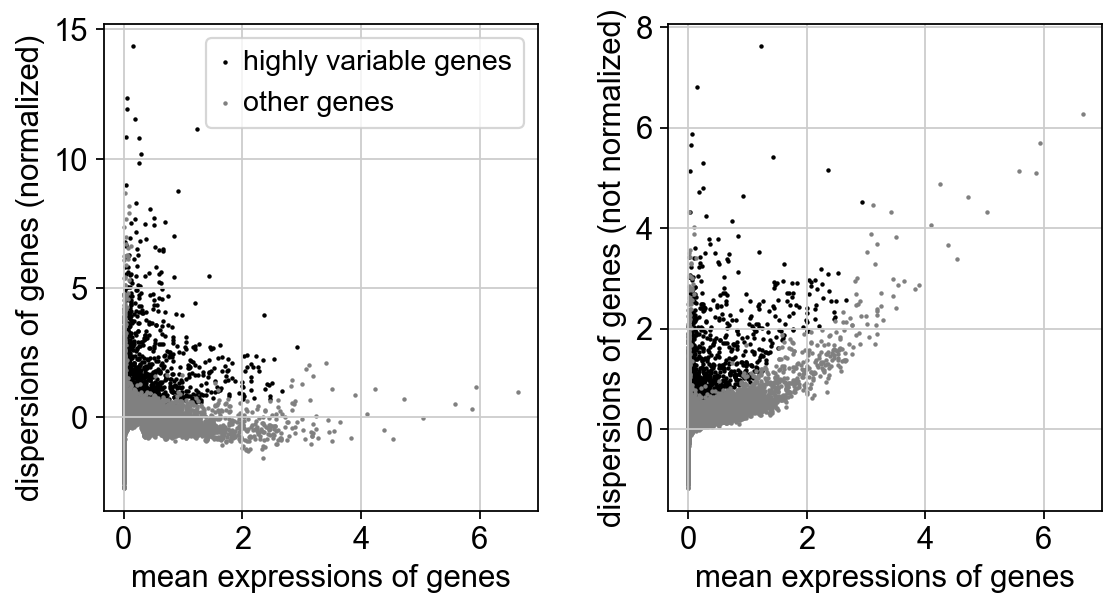

In [14]:
sc.pl.highly_variable_genes(adata)

In [16]:
#Ensure marker genes aren't making an impact to highly variable gene analysis downstream
adata.var.highly_variable['EGFP'] = False
adata.var.highly_variable['mScarlet'] = False
adata.var.highly_variable['Cre'] = False
adata.var.highly_variable['ERT'] = False
adata.var.highly_variable['iDTR'] = False
adata.var.highly_variable['tagBFP'] = False
adata.var.highly_variable['mKate2'] = False
adata.var.highly_variable['Akaluc'] = False
adata.var.highly_variable['tdTomato'] = False
adata.var.highly_variable['CLuc'] = False
adata.var.highly_variable['GLuc'] = False

/var/folders/xc/wjwqs2j55dqgp2ghrn6nmlj1nlk7kz/T/ipykernel_28156/2833403168.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adata.var.highly_variable['EGFP'] = False
/var/folders/xc/wjwqs2j55dqgp2ghrn6nmlj1nlk7kz/T/ipykernel_28156/283340

In [17]:
adata.raw = adata

In [18]:
adata.write('write/allmice-IGO17131_IGO17186_combined.h5ad', compression='gzip')